# Digital Image Processing - HW4 - 98722278 - Mohammad Doosti Lakhani
In this notebook, I have solved the assignment's problems which are as follows:

1. Explain the differences between DCT and Wavelet.
2. Using available formulas in the book:
    1. calculate `c0`, `d0`, and `d1` coefficient for Haar wavelet.
    
    ![question 2 formula](wiki/q2.jpg)
    2. Plot gained estimated function.
3. Do the following tasks on discrete signal `x = [1 2 3 4 5 0 8 8]` using Haar wavelet:
    1. Decompose  into `V(j) = V(j-1) ⊕ W(j-1)`
    2. Decompose `W(j-1)` into `V` and `W` again `V(j) = V(j-2) ⊕ W(j-2) ⊕ W(j-1)`
    3. Do step 1 and 2 using available `dwt` functions.
4. The noisy version of `img1` is `img2`. Use available `dwt` functions to denoise image using following procedures and compare results using _**PSNR**_ metric:
    1. Decompose image one level and remove `W_D(j-1)` completely.
    2. Decompose image one level and remove `W_D(j-1)`, `W_V(j-1)`, and `W_H(j-1)` completely.
    3. Compare different wavelet function for step 1 and 2.
    4. Zeroing all details lead to a low-quality image such as loosing edges which are not noises, so it it appropriate to only remove details which pertain noises. Propose a method to remove noises without hurting details regarding the original image. You are allowed to use results demonstrated in papers.
    5. Demonstrate your proposed approach via graph,tables, etc.

## 1 Explain the differences between DCT and Wavelet

1. First point I would like to focus on is that transforms like DCT or DFT work globally, but DWT has localization feature which mean we can play with coefficients in the way that only affect a particular spatial characteristic of the image, for instance, in DCT a particular cosine value is for all matched characterestics in whole image that if we zero it, we lose that feature in entire image.

2. The second feature of wavelets is that they perform scalable analysis on the signal which means every signal can be constructed using different scales and position of the basis functions, for instance, very large wavelets can represent coarse feature while small wavelets can represent very fine details.

3. Using DWT, we can approximate a function with a few coefficients in comparison with DCT which is absolutely useful in image comparission where it is currently is being used in JPEG2000.

4. As explained in the first point, because of localization feature, almost images can be compressed without considerable degradation.

## 2 Using available formulas in the book:
1. calculate `c0`, `d0`, and `d1` coefficient for Haar wavelet.
    
![question 2 formula](wiki/q2.jpg)
2. Plot gained estimated function for `f(x)`.

### 2.A
![ ](wiki/eqq2.jpg)

### 2.B
![ ](wiki/graph_q2.jpg)

## 3 Do the following tasks on discrete signal `x = [1 2 3 4 5 0 8 8]` using Haar wavelet:
1. Decompose  into `V(j) = V(j-1) ⊕ W(j-1)`
2. Decompose `W(j-1)` into `V` and `W` again `V(j) = V(j-2) ⊕ W(j-2) ⊕ W(j-1)`
3. Do step 1 and 2 using available `dwt` functions.

In [105]:
import pywt
from pywt import wavedec
import numpy as np

#### 3.A Decompose into V(j) = V(j-1) ⊕ W(j-1)
First of all, based on the book, we only need `phi(0,0)` and `psi(0,0)` to calculate `V(0)` but I do not know how this library return those values. It is obvious that `phi(0,0)` is an array of all `1`, so the result should be consistent if we do not take wavelet of the approximation part. So I cannot handle this question if I am going to validate my answers using this library. I could not find any usefull examples in the book, internet etc!
Here is the formula in the book, and it says the first value is consistent in any level. But the library only return this value at maximum possible level of wavelet, not any lower.
![discrete wavelet](wiki/dwt0.jpg)

And here is an example in the book compared results using library.

In [110]:
x = [1, 4, -3, 0]
print(wavedec(x, 'haar', mode='zero', level=1))
print(np.array(x)@np.array([1,1,1,1])/2)
print(wavedec(x, 'haar', mode='zero', level=2))

[array([ 3.53553391, -2.12132034]), array([-2.12132034, -2.12132034])]
1.0
[array([ 1.]), array([ 4.]), array([-2.12132034, -2.12132034])]


#

The question in the pdf:

In [122]:
x = np.array([1, 2, 3, 4, 5, 0, 8, 8])
print(wavedec(x, 'haar', mode='zero'))

[array([ 10.96015511]), array([-3.8890873]), array([-2. , -5.5]), array([-0.70710678, -0.70710678,  3.53553391,  0.        ])]


In [121]:
a = x@np.array([1,1,1,1,1,1,1,1])/3
d0 = x@np.array([1,1,1,1,-1,-1,-1,-1])/3
d1 = x@np.array([np.sqrt(2),np.sqrt(2),-np.sqrt(2),-np.sqrt(2),0,0,0,0])/3
d2 = x@np.array([0,0,0,0,np.sqrt(2),np.sqrt(2),-np.sqrt(2),-np.sqrt(2)])/3
print(a, d0, d1, d2)

10.3333333333 -3.66666666667 -1.88561808316 -5.1854497287


#### 3.C Do Step 1 and 2 Using Available `DWT` Functions

In [131]:
wavedec(x, 'haar', mode='zero', level=1)

[array([  2.12132034,   4.94974747,   3.53553391,  11.3137085 ]),
 array([-0.70710678, -0.70710678,  3.53553391,  0.        ])]

In [144]:
wavedec(wavedec(x, 'haar', mode='zero', level=1)[1], 'haar', mode='zero', level =1)

[array([-1. ,  2.5]), array([ -1.11022302e-16,   2.50000000e+00])]

## 4 The noisy version of `img1` is `img2`. Use available `dwt` functions to denoise image using following procedures and compare results using _**PSNR**_ metric:
1. Decompose image one level and remove `W_D(j-1)` completely.
2. Decompose image one level and remove `W_D(j-1)`, `W_V(j-1)`, and `W_H(j-1)` completely.
3. Compare different wavelet function for step 1 and 2.
4. Zeroing all details lead to a low-quality image such as loosing edges which are not noises, so it it appropriate to only remove details which pertain noises. Propose a method to remove noises without hurting details regarding the original image. You are allowed to use results demonstrated in papers.
5. Demonstrate your proposed approach via graph,tables, etc.

Here are the images:

`img1` ![img1](img1.bmp) `img2` ![img2](img2.bmp)

In [152]:
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr

#### 4.A Decompose image one level and remove W_D(j-1) completely.

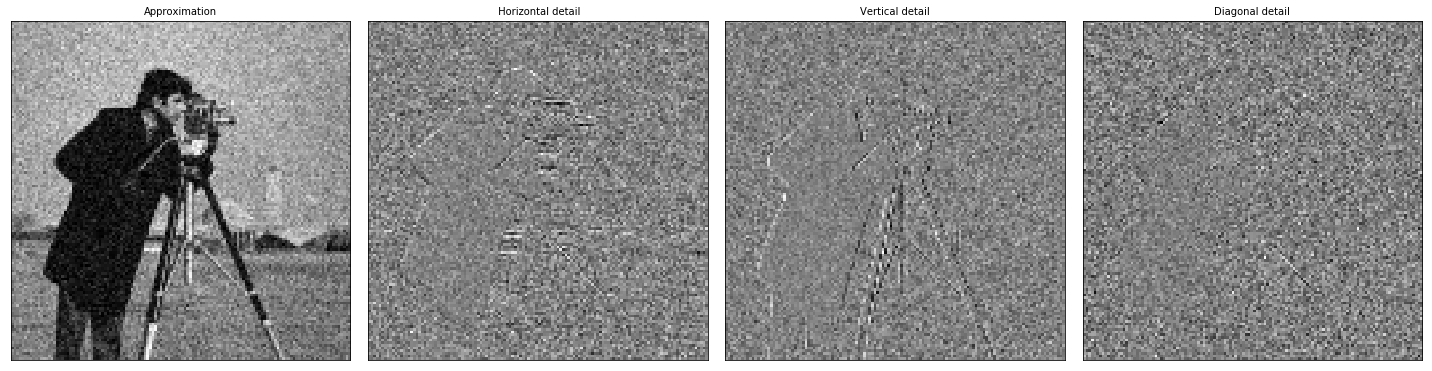

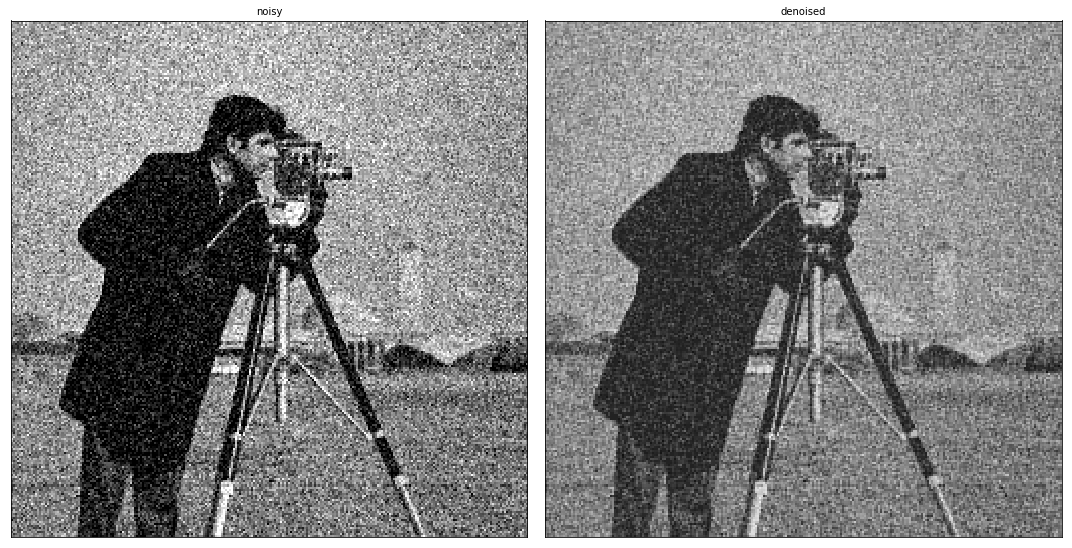

PSNR value: 18.636604880778794


In [166]:
noisy = plt.imread('img2.bmp')
original = plt.imread('img1.bmp')
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
LL, (LH, HL, HH) = pywt.dwt2(noisy, 'haar')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))
for i, a in enumerate([LL, LH, HL, HH]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

# denoising
titles = ['noisy', 'denoised']
denoised = pywt.idwt2((LL, (LH, HL, None)), 'haar')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i, a in enumerate([noisy, denoised]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

print('PSNR value: {}'.format(compare_psnr(original, denoised)))

#### 4.B Decompose image one level and remove W_D(j-1), W_V(j-1), and W_H(j-1) completely.

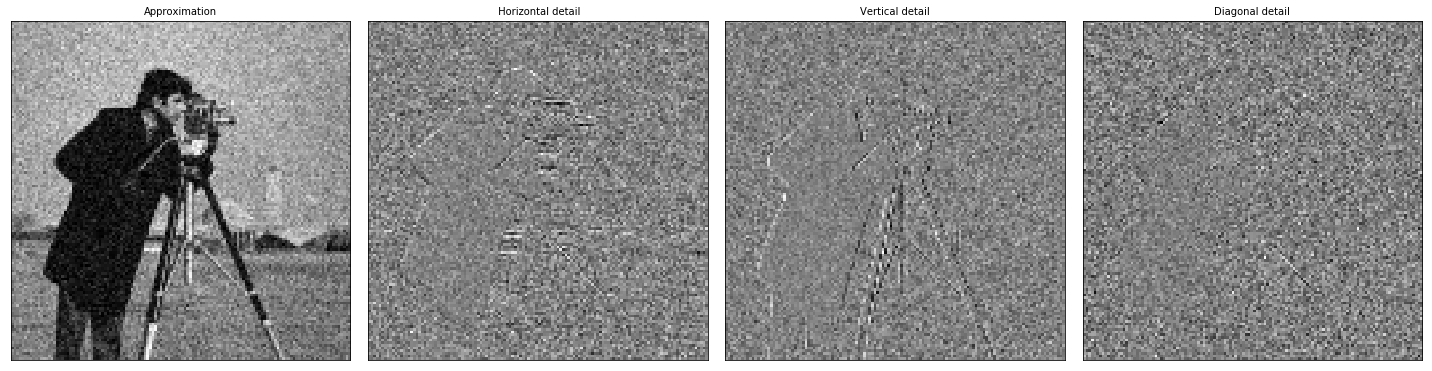

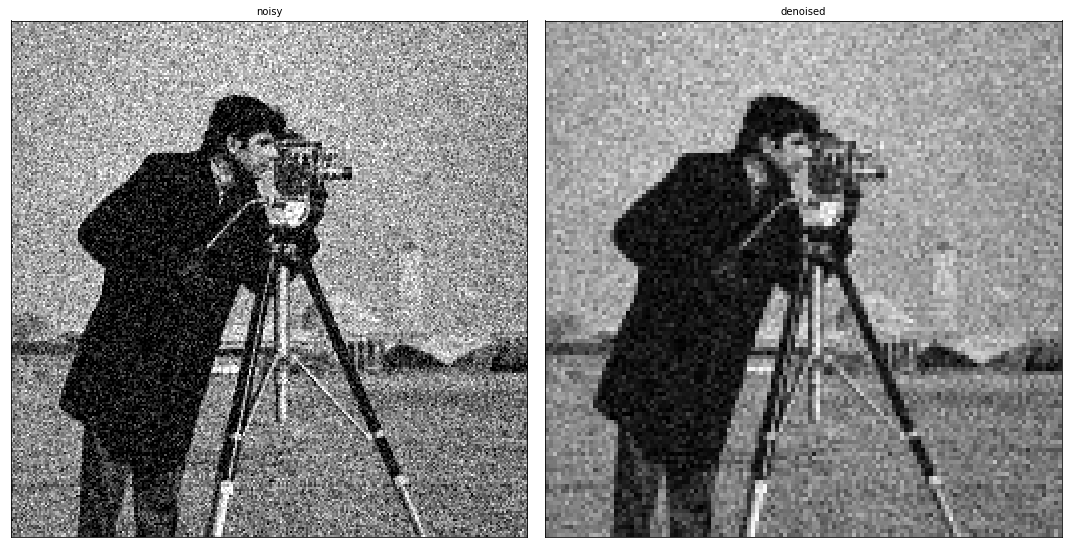

PSNR value: 21.304527635133958


In [167]:
noisy = plt.imread('img2.bmp')
original = plt.imread('img1.bmp')
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
LL, (LH, HL, HH) = pywt.dwt2(noisy, 'haar')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))
for i, a in enumerate([LL, LH, HL, HH]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

# denoising
titles = ['noisy', 'denoised']
denoised = pywt.idwt2((LL, (None, None, None)), 'haar')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i, a in enumerate([noisy, denoised]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

print('PSNR value: {}'.format(compare_psnr(original, denoised)))

#### 4.C Compare different wavelet function for step 1 and 2.

In [186]:
noisy = plt.imread('img2.bmp')
original = plt.imread('img1.bmp')

max_hh = 0
wave_hh = ''
max_ll = 0
wave_ll = ''
for family in pywt.families()[:-7]:
    for wave in pywt.wavelist(family):
        # Wavelet
        LL, (LH, HL, HH) = pywt.dwt2(noisy, wave)
        # denoising
        denoised_HH = pywt.idwt2((LL, (LH, HL, None)), wave)
        denoised_LL = pywt.idwt2((LL, (None, None, None)), wave)
        psnr_hh = compare_psnr(original, denoised_HH)
        psnr_ll = compare_psnr(original, denoised_LL)
        if psnr_hh > max_hh:
            max_hh = psnr_hh
            wave_hh = wave
        if psnr_ll > max_ll:
            max_ll = psnr_ll
            wave_ll = wave
print('PSNR - No Diagonal - wavelet:{} ======> {}'.format(wave_hh, max_hh))
print('PSNR - Only Approximation - wavelet:{} ======> {}'.format(wave_ll, max_ll))

PSNR - No Diagonal - wavelet:sym17 ======> 18.67134414690018
PSNR - Only Approximation - wavelet:db32 ======> 21.940123937910926


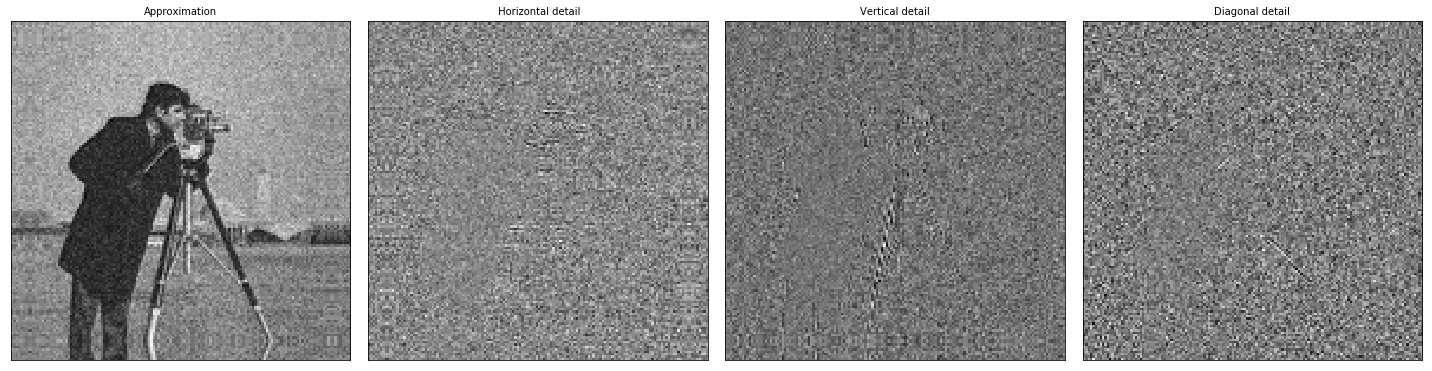

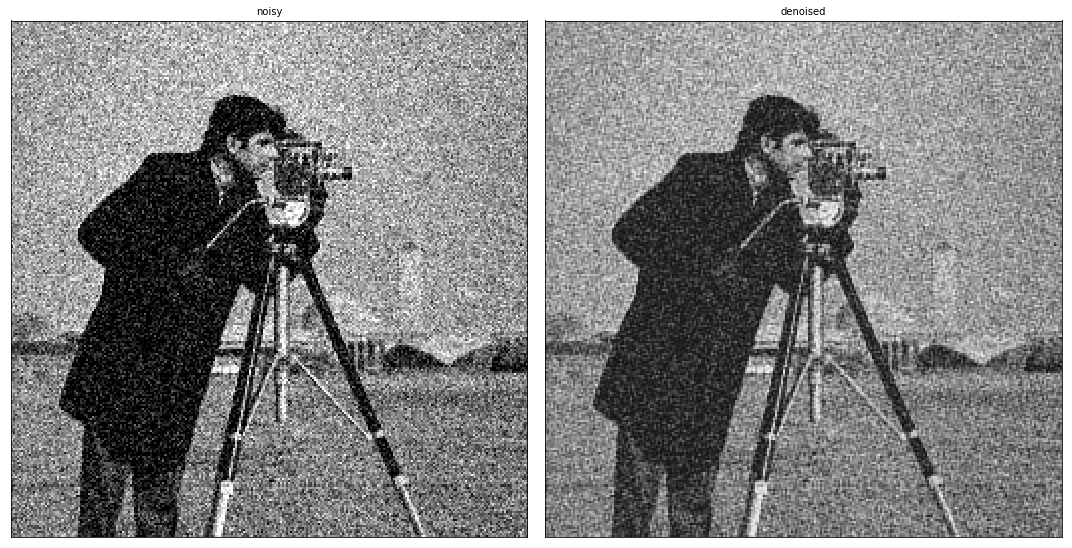

In [188]:
noisy = plt.imread('img2.bmp')
original = plt.imread('img1.bmp')
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
LL, (LH, HL, HH) = pywt.dwt2(noisy, 'sym17')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))
for i, a in enumerate([LL, LH, HL, HH]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

# denoising
titles = ['noisy', 'denoised']
denoised = pywt.idwt2((LL, (LH, HL, None)), 'sym17')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i, a in enumerate([noisy, denoised]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()


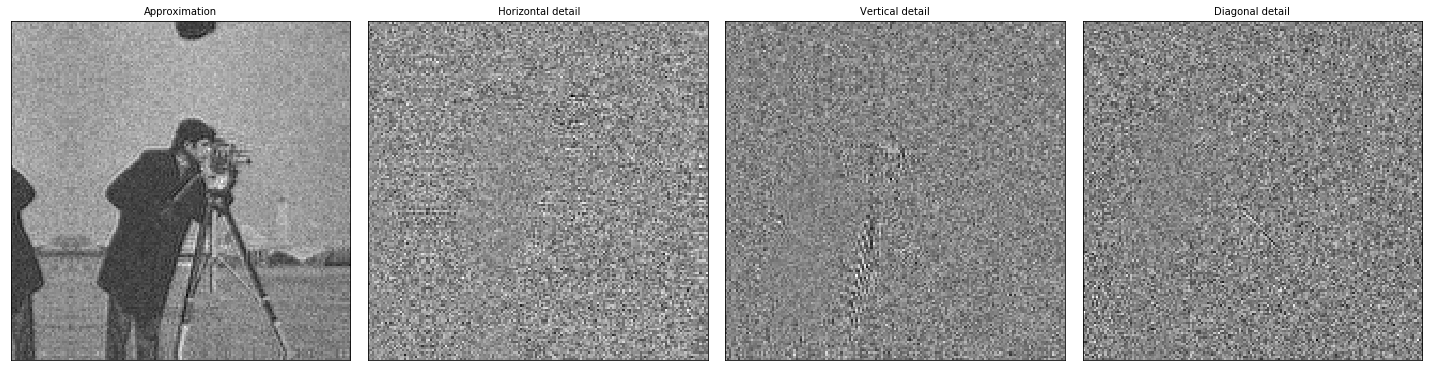

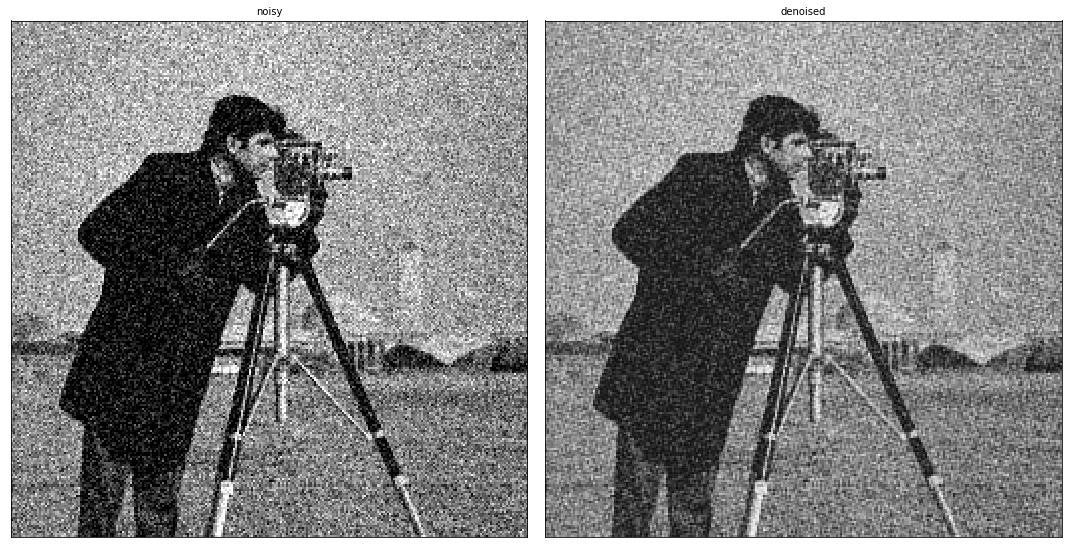

In [189]:
noisy = plt.imread('img2.bmp')
original = plt.imread('img1.bmp')
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
LL, (LH, HL, HH) = pywt.dwt2(noisy, 'db32')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))
for i, a in enumerate([LL, LH, HL, HH]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

# denoising
titles = ['noisy', 'denoised']
denoised = pywt.idwt2((LL, (LH, HL, None)), 'db32')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i, a in enumerate([noisy, denoised]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

#### 4.D Propose a Method To Remove Noises Without Hurting Details Regarding The Original Image

In [275]:
def thresholding(coeffs, sigma_d=2, k=30, kind='soft',
            sigma_levels=[0.889, 0.2, 0.086, 0.041, 0.020, 0.010, 0.005, 0.0025, 0.0012], level=0):
    for idx in range(1, len(coeffs[1:])):
         coeffs[idx] = pywt.threshold(coeffs[idx], sigma_d*k*sigma_levels[level], kind)
    return coeffs[0], (coeffs[1], coeffs[2], coeffs[3])

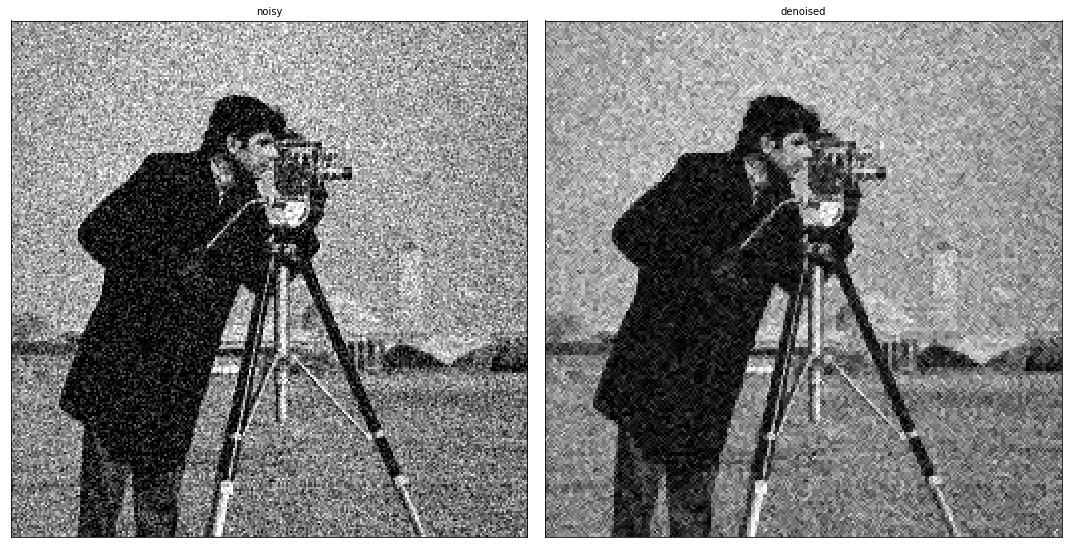

19.776739789903427

In [276]:
noisy = plt.imread('img2.bmp')
original = plt.imread('img1.bmp')

LL, (LH, HL, HH) = pywt.dwt2(noisy, 'haar')

# denoising
titles = ['noisy', 'denoised']
coeff = thresholding([LL, LH, HL, HH])
denoised = pywt.idwt2((coeff), 'haar')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i, a in enumerate([noisy, denoised]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

compare_psnr(original, denoised)

The method could be expanded for different levels and I have just implemented for 1 level of DWT. Those values are copied from different papers such as [A New Wavelet Denoising Method for Selecting Decomposition Levels and Noise Thresholds, Madhur Srivastava, 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079185/) and the source code of `pywavlets` and `scipy`.
Actually, the expand of this method would be working on the Kth approximations and hard-thresholding Kth level details. 